## Métrica: Índice de Agressividade no Meio-Campo Adversário em Desvantagem

### Definição  
A métrica avalia o volume de pressão defensiva no **meio-campo adversário** quando uma equipa está em desvantagem no marcador. Mede a frequência de desarmes, interceções, recuperações de bola e faltas
cometidas nessa zona do campo, dividida pelo tempo que a equipa passou a perder.

### Fórmula  
$$
\frac{\text{Desarmes + Interceções + Recuperações de bola + Faltas cometidas no meio-campo adversário}}{\text{Minutos em desvantagem}}
$$

### Filtros Aplicados  
- Considerar apenas eventos quando a equipa **está a perder**.
- Zona do campo: **Meio-campo adversário**.
- Eventos incluídos:
  - **Ações Defensivas**: `7 (Tackle)`, `8 (Interception)`, `49 (Ball Recovery)`.
  - **Faltas Cometidas**: `4 (Foul)`.

### Objetivo  
O objetivo desta métrica é avaliar como uma equipa reage defensivamente no meio-campo adversário quando está em desvantagem no marcador, medindo a intensidade da sua pressão alta defensiva.

Através desta métrica, podemos perceber se uma equipa procura recuperar rapidamente a posse de bola para inverter o resultado ou se adota uma abordagem mais passiva. Além disso, permite identificar diferenças estratégicas entre equipas, analisando a sua agressividade em momentos de adversidade e avaliando a eficácia dessa pressão na recuperação da bola e no controlo do jogo.


In [1]:
import xml.etree.ElementTree as et
#from lxml import etree
import pandas as pd
from IPython.core import display as ICD
from pandas import json_normalize
import pandas as pd
#import tqdm as tqdm
from tqdm.notebook import tqdm
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
from datetime import datetime
import time
import numpy as np

#@title
types_dict={1:"Pass",2:"Offside Pass",3:"Take On",4:"Foul",5:"Out",6:"Corner Awarded",7:"Tackle",8:"Interception",9:"Turnover",10:"Save",11:"Claim",12:"Clearance",13:"Miss",14:"Post",15:"Attempt Saved",16:"Goal",17:"Card",18:"Player off",19:"Player on",20:"Player retired",21:"Player returns",22:"Player becomes goalkeeper",23:"Goalkeeper becomes player",24:"Condition change",25:"Official change",27:"Start delay",28:"End delay",30:"End",31:"Picked an orange",32:"Start",34:"Team set up",35:"Player changed position",36:"Player changed Jersey number",37:"Collection End",38:"Temp_Goal",39:"Temp_Attempt",40:"Formation change",41:"Punch",42:"Good Skill",43:"Deleted event",44:"Aerial",45:"Challenge",47:"Rescinded card",49:"Ball recovery",50:"Dispossessed",51:"Error",52:"Keeper pick-up",53:"Cross not claimed",54:"Smother",55:"Offside provoked",56:"Shield ball opp",57:"Foul throw-in",58:"Penalty faced",59:"Keeper Sweeper",60:"Chance missed",61:"Ball touch",63:"Temp_Save",64:"Resume",65:"Contentious referee decision",67:"50/50",68:"Referee drop ball",69:"Failed To Block",72:"Caught offside",73:"Other Ball Contact",74:"Blocked pass"};
types = pd.DataFrame.from_dict(types_dict,orient='index').reset_index()
types.columns=["type_id","event_name"]

qualifiers_dict={1:"Long ball",2:"Cross",3:"Head pass",4:"Through ball",5:"Free kick taken",6:"Corner taken",7:"Players caught offside",8:"Goal disallowed",9:"Penalty",10:"Hand",11:"6-seconds violation",12:"Dangerous play",13:"Foul",14:"Last line",15:"Head",16:"Small box-centre",17:"Box-centre",18:"Out of box-centre",19:"35+ centre",20:"Right footed",21:"Other body part",22:"Regular play",23:"Fast break",24:"Set piece",25:"From corner",26:"Free kick",28:"Own goal",29:"Assisted",30:"Involved",31:"Yellow Card",32:"Second yellow",33:"Red card",34:"Referee abuse",35:"Argument",36:"Fight",37:"Time wasting",38:"Excessive celebration",39:"Crowd interaction",40:"Other reason",41:"Injury",42:"Tactical",44:"Player position",49:"Attendance figure",50:"Official position",51:"Official ID",53:"Injured player id",54:"End cause",55:"Related event ID",56:"Zone",57:"End type",59:"Jersey number",60:"Small box-right",61:"Small box-left",62:"Box-deep right",63:"Box-right",64:"Box-left",65:"Box-deep left",66:"Out of box-deep right",67:"Out of box-right",68:"Out of box-left",69:"Out of box-deep left",70:"35+ right",71:"35+ left",72:"Left footed",73:"Left",74:"High",75:"Right",76:"Low left",77:"High left",78:"Low centre",79:"High centre",80:"Low right",81:"High right",82:"Blocked",83:"Close left",84:"Close right",85:"Close high",86:"Close left and high",87:"Close right and high",88:"High claim",89:"1 on 1",90:"Deflected save",91:"Dive and deflect",92:"Catch",93:"Dive and catch",94:"Def block",95:"Back pass",96:"Corner situation",97:"Direct free",100:"Six yard blocked",101:"Saved off line",102:"Goal mouth y co-ordinate",103:"Goal mouth z co-ordinate",106:"Attacking Pass",107:"Throw-in",108:"Volley",109:"Overhead",110:"Half Volley",111:"Diving Header",112:"Scramble",113:"Strong",114:"Weak",115:"Rising",116:"Dipping",117:"Lob",118:"One Bounce",119:"Few Bounces",120:"Swerve Left",121:"Swerve Right",122:"Swerve Moving",123:"Keeper Throw",124:"Goal Kick",127:"Direction of play",128:"Punch",130:"Team formation",131:"Team player formation",132:"Dive",133:"Deflection",134:"Far Wide Left",135:"Far Wide Right",136:"Keeper Touched",137:"Keeper Saved",138:"Hit Woodwork",139:"Own Player",140:"Pass End X",141:"Pass End Y",144:"Deleted event type",145:"Formation slot",146:"Blocked x co-ordinate",147:"Blocked y co-ordinate",153:"Not past goal line",154:"Intentional assist",155:"Chipped",156:"Lay-off",157:"Launch",158:"Persistent infringement",159:"Foul and abusive language",160:"Throw-in set piece",161:"Encroachment",162:"Leaving field",163:"Entering field",164:"Spitting",165:"Professional foul",166:"Handling on the line",167:"Out of play",168:"Flick-on",169:"Leading to attempt",170:"Leading to goal",171:"Rescinded card",172:"No impact on timing",173:"Parried safe",174:"Parried danger",175:"Fingertip",176:"Caught",177:"Collected",178:"Standing",179:"Diving",180:"Stooping",181:"Reaching",182:"Hands",183:"Feet",184:"Dissent",185:"Blocked cross",186:"Scored",187:"Saved",188:"Missed",189:"Player not visible",190:"From shot off target",191:"Off the ball foul",192:"Block by hand",194:"Captain",195:"Pull Back",196:"Switch of play",197:"Team kit",198:"GK hoof",199:"Gk kick from hands",200:"Referee stop",201:"Referee delay",202:"Weather problem",203:"Crowd trouble",204:"Fire",205:"Object thrown on pitch",206:"Spectator on pitch",207:"Awaiting officials decision",208:"Referee Injury",209:"Game end",210:"Assist",211:"Overrun",212:"Length",213:"Angle",214:"Big Chance",215:"Individual Play",216:"2nd related event ID",217:"2nd assisted",218:"2nd assist",219:"Players on both posts",220:"Player on near post",221:"Player on far post",222:"No players on posts",223:"In-swinger",224:"Out-swinger",225:"Straight",226:"Suspended",227:"Resume",228:"Own shot blocked",229:"Post-match complete",230:"GK X Coordinate",231:"GK Y Coordinate",232:"Unchallenged"};
qualifiers = pd.DataFrame.from_dict(qualifiers_dict,orient='index').reset_index()
qualifiers.columns = ["qualifier_id","description"]

qualifiers_dict2 = {str(key): str(value) for key, value in qualifiers_dict.items()}


def parsef24_folder(F24folder):
  games_list = []
  events_list = []

  for file in tqdm(os.listdir(F24folder)):
    if file.endswith(".xml"):
      file_path = os.path.join(F24folder, file)
      #print(f"Processing: {file_path}")

      tree = et.ElementTree(file=file_path)
      games = tree.getroot()
      gameinfo = games.findall('Game')[0]  # Assuming there's always one 'Game' element

      # Cache game metadata
      game_id = gameinfo.get('id')
      game_meta = {
          "game_id": game_id,
          "home_team_id": gameinfo.get('home_team_id'),
          "home_team_name": gameinfo.get('home_team_name'),
          "away_team_id": gameinfo.get('away_team_id'),
          "away_team_name": gameinfo.get('away_team_name'),
          "competition_id": gameinfo.get('competition_id'),
          "competition_name": gameinfo.get('competition_name'),
          "season_id": gameinfo.get('season_id'),
      }
      games_list.append(game_meta)

      for game in games:
        for event in game:
          # Build a dictionary for the event data
          event_data = event.attrib.copy()
          # Use list comprehension to extract qualifiers
          event_data["qualifiers"] = [q.attrib for q in event]
          event_data["game_id"] = game_id  # Attach game metadata to event
          # Build a DataFrame for this event and append it to the list
          events_list.append(event_data)

  # Concatenate all parsed events into a single DataFrame
  game_df = pd.DataFrame(games_list)
  match_events = pd.DataFrame(events_list)

  match_events[["id","event_id","type_id","period_id","min","sec"]] = match_events[["id","event_id","type_id","period_id","min","sec"]].astype(int)
  match_events[["y","x"]] = match_events[["y","x"]].astype(float)
  match_events = pd.merge(match_events,types, on="type_id", how = "left")
  match_events = match_events[ ['id',"event_id","type_id", "event_name" ]+ [ col for col in match_events.columns if col not in ['id',"event_id","type_id", "event_name" ] ] ]

  # add game info to match_events
  match_events = pd.merge(match_events, game_df, on="game_id", how="inner")

  return match_events


def explode_event(nome_df, id_evento, mytresh):
    # Filter the dataframe for the required event type
    nome_df = nome_df[nome_df["type_id"] == id_evento].copy()

    if nome_df.empty:
        return pd.DataFrame()  # Return empty if no matching events

    # Explode 'qualifiers' column (assuming it's a list of dictionaries)
    nome_df_exploded = nome_df.explode("qualifiers")

    # Normalize the qualifiers column
    qualifiers_df = pd.json_normalize(nome_df_exploded["qualifiers"]).fillna("yes")

    # Add the event ID back to qualifiers_df
    qualifiers_df["id"] = nome_df_exploded["id"].values

    # pivot table
    qualifiers_df = qualifiers_df\
      .pivot_table(index='id', columns='qualifier_id', values='value', aggfunc='first')\
      .reset_index()

    # Rename columns based on your dictionary
    qualifiers_df.rename(columns=qualifiers_dict2, inplace=True)

    # Drop columns that have too many NaN values
    min_non_na = len(qualifiers_df) * mytresh
    qualifiers_df = qualifiers_df.dropna(thresh=min_non_na, axis=1)

    # Drop the original exploded 'qualifiers' column
    nome_df = nome_df.drop(columns=["qualifiers"])

    # Merge back
    exploded_df = nome_df.merge(qualifiers_df, on="id", how="outer").fillna("-")

    return exploded_df




In [2]:
dados_liga_portuguesa = parsef24_folder("/content/drive/MyDrive/OPTA Data/OPTA Data/F24 - Portugal")

  0%|          | 0/300 [00:00<?, ?it/s]

In [3]:
dados_liga_brasileira = parsef24_folder("/content/drive/MyDrive/OPTA Data/OPTA Data/F24 - Brasil")

  0%|          | 0/372 [00:00<?, ?it/s]

In [54]:
# Caminho da pasta onde estão os ficheiros XLSX
caminho_dados = "/content/drive/MyDrive/OPTA Data/OPTA Data"

# Lista para armazenar os dados das equipas
equipas_lista = []

# Percorrer os ficheiros XLSX
for file in tqdm(os.listdir(caminho_dados)):
    if file.endswith(".xlsx"):
        print(f"Processando: {file}")
        file_path = os.path.join(caminho_dados, file)
        df = pd.read_excel(file_path)
        equipas_lista.append(df[["team_name", "team_ids"]])

# Concatenar os dados de ambos os ficheiros e remover duplicados
df_equipas = pd.concat(equipas_lista, ignore_index=True).drop_duplicates()
df_equipas = df_equipas.rename(columns={'team_ids': 'team_id'})

# Mostrar os resultados
df_equipas


 20%|██        | 1/5 [00:00<00:00,  6.49it/s]

Processando: opta_planteis_brasil.xlsx
Processando: opta_planteis_portugal.xlsx


100%|██████████| 5/5 [00:00<00:00, 18.16it/s]


,team_name,team_id
0,Athletico Paranaense,2572
48,Atlético Goianiense,1062
77,Atlético Mineiro,1373
127,Bahia,1578
180,Botafogo,1419
...,...,...
1394,SC Farense,3217
1426,Sporting Braga,372
1478,Sporting CP,255
1518,Tondela,6685


In [84]:
# Definir eventos defensivos relevantes
eventos_defensivos = [4, 7, 8, 49]  # Foul, Tackle, Interception, Ball Recovery

def calcular_metrica_por_jogo(liga):

  # Criar DataFrame para armazenar a métrica
  metricas = []

  # Obter lista de jogos únicos
  jogos = liga["game_id"].unique()

  counter = 0

  # Iterar sobre cada jogo
  for jogo in jogos:
      counter += 1

      print(round(counter / len(jogos) * 100, 2), "% dos jogos processados")

      df_jogo = liga[liga["game_id"] == jogo]

      # Identificar as equipas do jogo
      equipa_casa = df_jogo["home_team_id"].iloc[0]
      equipa_fora = df_jogo["away_team_id"].iloc[0]

      # Criar um dicionário para armazenar os períodos de desvantagem
      momentos_desvantagem = {equipa_casa: set(), equipa_fora: set()}

      # Contagem de golos para determinar os períodos de desvantagem
      golos_casa = 0
      golos_fora = 0
      inicio_desvantagem = {equipa_casa: None, equipa_fora: None}  # Guarda quando começa a perder

      for _, evento in df_jogo.iterrows():
          tempo_atual = evento["min"] * 60 + evento["sec"]  # Converter para segundos

          if evento["event_name"] == "Goal":
              if evento["team_id"] == equipa_casa:
                  golos_casa += 1
              else:
                  golos_fora += 1

          # Atualizar o estado de desvantagem
          if golos_casa > golos_fora:
              if inicio_desvantagem[equipa_fora] is None:  # Se ainda não estava a perder, começa agora
                  inicio_desvantagem[equipa_fora] = tempo_atual
          elif golos_fora > golos_casa:
              if inicio_desvantagem[equipa_casa] is None:
                  inicio_desvantagem[equipa_casa] = tempo_atual
          else:  # Se o resultado volta a ficar empatado, termina a desvantagem
              for equipa in [equipa_casa, equipa_fora]:
                  if inicio_desvantagem[equipa] is not None:  # Se estava a perder
                      # Guardar todos os segundos desde que começou a perder até agora
                      momentos_desvantagem[equipa].update(range(inicio_desvantagem[equipa], tempo_atual + 1))
                      inicio_desvantagem[equipa] = None  # Reset da desvantagem

      # Se o jogo termina e uma equipa ainda estava a perder, guardar até ao último segundo
      tempo_final = df_jogo["min"].max() * 60 + df_jogo["sec"].max()
      for equipa in [equipa_casa, equipa_fora]:
          if inicio_desvantagem[equipa] is not None:
              momentos_desvantagem[equipa].update(range(inicio_desvantagem[equipa], tempo_final + 1))

      # Filtrar eventos defensivos no meio-campo adversário
      for equipa in [equipa_casa, equipa_fora]:
          adversario = equipa_fora if equipa == equipa_casa else equipa_casa

          df_defensivo = df_jogo[
              (df_jogo["team_id"] == equipa) &  # Eventos da equipa
              (df_jogo["type_id"].isin(eventos_defensivos)) &  # Apenas eventos defensivos
              ( # Verificar zona do terreno com base na parte do jogo em questão
                  ((df_jogo["period_id"] == 1) & (df_jogo["x"] > 50) & (equipa == df_jogo["home_team_id"])) |
                  ((df_jogo["period_id"] == 1) & (df_jogo["x"] < 50) & (equipa == df_jogo["away_team_id"])) |
                  ((df_jogo["period_id"] == 2) & (df_jogo["x"] < 50) & (equipa == df_jogo["home_team_id"])) |
                  ((df_jogo["period_id"] == 2) & (df_jogo["x"] > 50) & (equipa == df_jogo["away_team_id"]))
              )
          ]

          # Filtrar os eventos para garantir que ocorreram nos momentos de desvantagem
          df_defensivo = df_defensivo[
              df_defensivo.apply(lambda row: (row["min"] * 60 + row["sec"]) in momentos_desvantagem[equipa], axis=1)
          ]

          # Calcular a métrica
          total_acoes_defensivas_desvantagem = len(df_defensivo)
          segundos_em_desvantagem = len(momentos_desvantagem[equipa])  # Contar segundos totais
          minutos_em_desvantagem = segundos_em_desvantagem / 60  # Converter para minutos

          if minutos_em_desvantagem > 0:
              agressividade = total_acoes_defensivas_desvantagem / minutos_em_desvantagem
          else:
              agressividade = np.nan # Caso a equipa nunca tenha estado a perder

          # Guardar resultados
          metricas.append({
              "game_id": jogo,
              "team_id": equipa,
              "agressividade_meio_campo_adversario": agressividade,
              "acoes_defensivas_desvantagem": total_acoes_defensivas_desvantagem,
              "segundos_em_desvantagem": segundos_em_desvantagem,
              "minutos_em_desvantagem": minutos_em_desvantagem
          })

  # Criar DataFrame final com os resultados
  df_metricas = pd.DataFrame(metricas)

  # Mostrar os resultados
  return df_metricas


In [85]:
metricas_por_jogo_brasil = calcular_metrica_por_jogo(dados_liga_brasileira)

0.27 % dos jogos processados
0.54 % dos jogos processados
0.81 % dos jogos processados
1.08 % dos jogos processados
1.34 % dos jogos processados
1.61 % dos jogos processados
1.88 % dos jogos processados
2.15 % dos jogos processados
2.42 % dos jogos processados
2.69 % dos jogos processados
2.96 % dos jogos processados
3.23 % dos jogos processados
3.49 % dos jogos processados
3.76 % dos jogos processados
4.03 % dos jogos processados
4.3 % dos jogos processados
4.57 % dos jogos processados
4.84 % dos jogos processados
5.11 % dos jogos processados
5.38 % dos jogos processados
5.65 % dos jogos processados
5.91 % dos jogos processados
6.18 % dos jogos processados
6.45 % dos jogos processados
6.72 % dos jogos processados
6.99 % dos jogos processados
7.26 % dos jogos processados
7.53 % dos jogos processados
7.8 % dos jogos processados
8.06 % dos jogos processados
8.33 % dos jogos processados
8.6 % dos jogos processados
8.87 % dos jogos processados
9.14 % dos jogos processados
9.41 % dos jogos 

In [86]:
metricas_por_jogo_portugal = calcular_metrica_por_jogo(dados_liga_portuguesa)

0.33 % dos jogos processados
0.67 % dos jogos processados
1.0 % dos jogos processados
1.33 % dos jogos processados
1.67 % dos jogos processados
2.0 % dos jogos processados
2.33 % dos jogos processados
2.67 % dos jogos processados
3.0 % dos jogos processados
3.33 % dos jogos processados
3.67 % dos jogos processados
4.0 % dos jogos processados
4.33 % dos jogos processados
4.67 % dos jogos processados
5.0 % dos jogos processados
5.33 % dos jogos processados
5.67 % dos jogos processados
6.0 % dos jogos processados
6.33 % dos jogos processados
6.67 % dos jogos processados
7.0 % dos jogos processados
7.33 % dos jogos processados
7.67 % dos jogos processados
8.0 % dos jogos processados
8.33 % dos jogos processados
8.67 % dos jogos processados
9.0 % dos jogos processados
9.33 % dos jogos processados
9.67 % dos jogos processados
10.0 % dos jogos processados
10.33 % dos jogos processados
10.67 % dos jogos processados
11.0 % dos jogos processados
11.33 % dos jogos processados
11.67 % dos jogos pr

In [87]:
# Calcular a média de agressividade no meio-campo adversário em desvantagem para cada team_id
def media_agressividade_equipa(df):

  media_agressividade= (
      df.groupby("team_id")["agressividade_meio_campo_adversario"]
      .mean()
      .reset_index()
  )

  # Garantir que ambas as colunas têm o mesmo tipo
  media_agressividade["team_id"] = media_agressividade["team_id"].astype(int)
  df_equipas["team_id"] = df_equipas["team_id"].astype(int)

  # Substituir team_id pelo nome da equipa
  media_agressividade = media_agressividade.merge(
      df_equipas[['team_id', 'team_name']], on='team_id', how='left'
  )

  # Remover a coluna team_id
  media_agressividade.drop(columns=['team_id'], inplace=True)

  return media_agressividade

In [88]:
media_agressividade_brasil = media_agressividade_equipa(metricas_por_jogo_brasil)
media_agressividade_portugal = media_agressividade_equipa(metricas_por_jogo_portugal)
print(media_agressividade_brasil)
print(media_agressividade_portugal)


    agressividade_meio_campo_adversario            team_name
0                              0.644156             Flamengo
1                              0.475033  Atlético Goianiense
2                              0.463486         Fortaleza EC
3                              0.443426               Santos
4                              0.464514               Grêmio
..                                  ...                  ...
15                             0.524892        Internacional
16                             0.488581          Corinthians
17                             0.444350            Palmeiras
18                             0.403290                Goiás
19                             0.486614  Red Bull Bragantino

[20 rows x 2 columns]
    agressividade_meio_campo_adversario          team_name
0                              0.505971           Boavista
1                              0.513221       Portimonense
2                              0.380394  Paços de Ferreira
3        

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_agressividade(df):

    # Ordenar os dados pela métrica
    df = df.sort_values(by="agressividade_meio_campo_adversario")

    plt.figure(figsize=(12, 6))

    # Criar o gráfico de dispersão
    sns.scatterplot(x="team_name", y="agressividade_meio_campo_adversario", data=df, color="blue", s=100)

    # Adicionar uma linha média
    media = df["agressividade_meio_campo_adversario"].mean()
    plt.axhline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')

    plt.xticks(rotation=90)  # Rodar os nomes das equipas para melhor leitura
    plt.xlabel("Equipa")
    plt.ylabel("Índice de Agressividade")
    plt.title("Agressividade das Equipas no Meio-Campo Adversário em Desvantagem")
    plt.legend()
    plt.grid(False)
    plt.show()

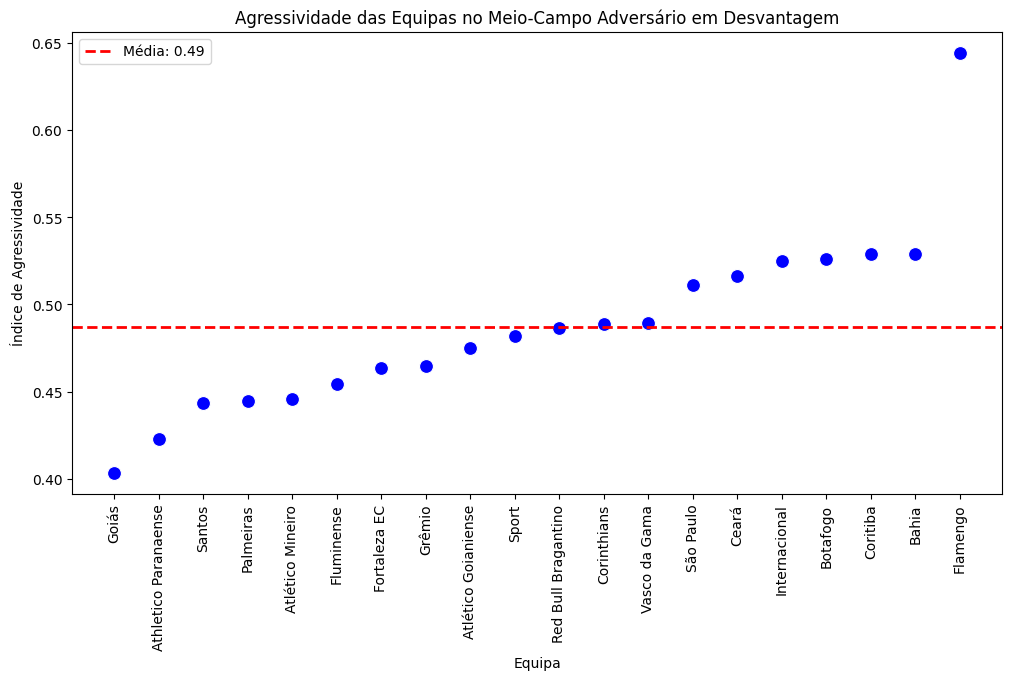

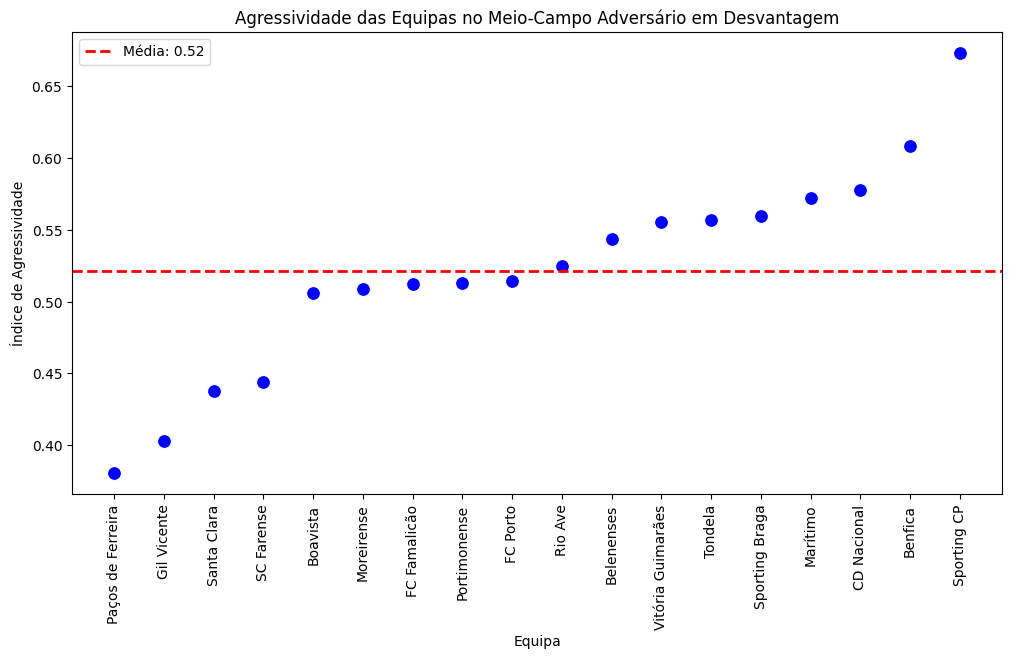

In [90]:
plot_agressividade(media_agressividade_brasil)
plot_agressividade(media_agressividade_portugal)

# Análise da Agressividade Defensiva no Meio-Campo Adversário em Desvantagem

Os gráficos apresentados representam a **agressividade defensiva** das equipas de dois campeonatos distintos quando estão em desvantagem no marcador. O valor calculado corresponde ao **número médio de ações defensivas por minuto** no meio-campo adversário durante esses períodos de desvantagem.

Cada ponto azul representa uma equipa, e a linha vermelha tracejada indica a **média do campeonato** para esta métrica, permitindo uma comparação direta entre as equipas.

---

# **Análise do Campeonato Português**
No primeiro gráfico, relativo ao **Campeonato Português**, podemos observar que:
- A média geral do índice de agressividade está em **0.52**, o que significa que, em média, as equipas realizam **0.52 ações defensivas por minuto** no meio-campo adversário quando estão a perder.
- O **Sporting CP** destaca-se como a equipa mais agressiva em desvantagem, superando todas as outras com uma margem considerável.
- Equipas como **Benfica e Nacional** também apresentam valores acima da média, o que aponta para uma abordagem ofensiva mesmo quando se encontram em situações de desvantagem.
- No extremo oposto, equipas como **Paços de Ferreira, Gil Vicente e Santa Clara** apresentam valores significativamente mais baixos. Isto sugere uma postura mais passiva ou recuada quando estão a perder.

---

# **Análise do Campeonato Brasileiro**
No segundo gráfico, relativo ao **Campeonato Brasileiro**, os principais destaques são:
- A média geral da agressividade defensiva no meio-campo adversário é de **0.49**, ligeiramente inferior à do Campeonato Português.
- O **Flamengo** apresenta um valor de agressividade **bastante superior** ao das outras equipas.
- Outras equipas como **Bahia, Coritiba e Botafogo** também apresentam valores acima da média.
- No extremo oposto, equipas como **Goiás e Athletico Paranaense** têm um índice de agressividade mais baixo, indicando uma abordagem mais cautelosa.

---

# **Importância para a Análise Tática no Futebol**
A métrica calculada neste trabalho é relevante na **análise tática** no futebol, uma vez que contribui para a:

- **Identificação de estilos de jogo:** Equipas com valores elevados tendem a ter uma mentalidade mais agressiva e pressionante, enquanto equipas com valores mais baixos podem adotar estratégias mais cautelosas.
- **Avaliação do comportamento em desvantagem:** Saber como uma equipa reage quando está a perder pode ser essencial para preparar estratégias de recuperação ou mesmo de contenção do adversário.
- **Análise de adversários:** Equipas podem usar estes dados para preparar-se melhor contra adversários específicos, explorando fraquezas ou antecipando comportamentos relativos ao seu comportamento em situações de desvantagem na partida.